In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import folium
from sklearn.cluster import KMeans #k-means clustering
from yellowbrick.cluster import KElbowVisualizer #Elbow visualize K-means

In [2]:
df_ori = pd.read_csv("Lesson30-uber-raw-data-aug14.csv")
df_ori 

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [3]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  829275 non-null  object 
 1   Lat        829275 non-null  float64
 2   Lon        829275 non-null  float64
 3   Base       829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


In [4]:
df_ori.Base.unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [5]:
clus_k_ori = df_ori[["Lat","Lon"]]
clus_k_ori

,Lat,Lon
0,40.7366,-73.9906
1,40.7260,-73.9918
2,40.7209,-74.0507
3,40.7387,-73.9856
4,40.7323,-74.0077
...,...,...
829270,40.7552,-73.9753
829271,40.7552,-73.9753
829272,40.7617,-73.9788
829273,40.7395,-73.9889


In [6]:
#to show the elbow plot point

import time
start_time=time.time()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer # Add this line

# visualizer = KElbowVisualizer(KMeans(random_state=42),k=16,metric='distortion')
# visualizer.fit(clus_k_ori)
# visualizer.show()

end_time = time.time()

end_time-start_time  

8.630752563476562e-05

In [7]:
kmeans_ori = KMeans(n_clusters=5,random_state=0)
kmeans_ori.fit(clus_k_ori)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [8]:
centroid_k_ori = kmeans_ori.cluster_centers_
centroid_k_ori

array([[ 40.68656302, -73.96446209],
       [ 40.78671631, -73.93501108],
       [ 40.67076443, -73.79198771],
       [ 40.74079553, -73.99454505],
       [ 40.84829955, -73.57590837]])

In [9]:
clocation_k_ori = pd.DataFrame(centroid_k_ori,columns=["Latitude","Longitude"])
clocation_k_ori 

,Latitude,Longitude
0,40.686563,-73.964462
1,40.786716,-73.935011
2,40.670764,-73.791988
3,40.740796,-73.994545
4,40.848300,-73.575908


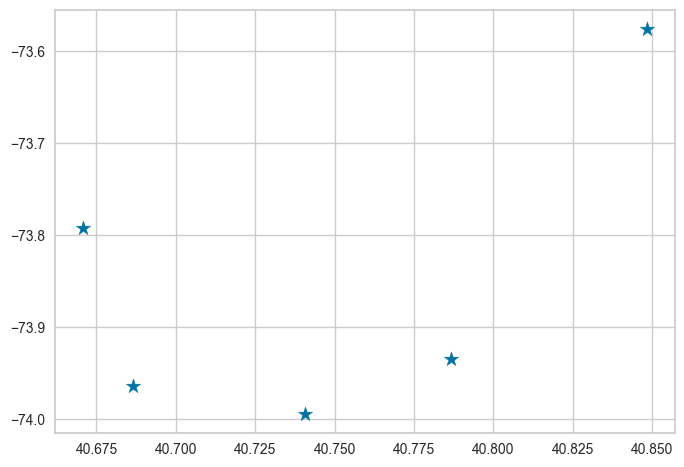

In [10]:
plt.scatter(clocation_k_ori["Latitude"],clocation_k_ori["Longitude"],marker="*",s=120)

In [11]:
clocation_k_ori.values.tolist()

[[40.68656301663267, -73.96446208614468],
 [40.78671630795188, -73.93501108348005],
 [40.67076442750906, -73.79198770511954],
 [40.74079553144024, -73.99454505444852],
 [40.848299551457764, -73.57590837278843]]

In [12]:
centroid_k_ori[0]

array([ 40.68656302, -73.96446209])

In [13]:
centroid_k_ori = clocation_k_ori.values.tolist()

map_k_ori = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)

for point in range(0, len(centroid_k_ori)):
    folium.Marker(centroid_k_ori[point], popup = centroid_k_ori[point]).add_to(map_k_ori)

map_k_ori

In [14]:
label_k_ori = kmeans_ori.labels_
label_k_ori

array([3, 3, 3, ..., 3, 3, 3], shape=(829275,), dtype=int32)

In [15]:
set(label_k_ori)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)}

In [16]:
df_new_k = df_ori.copy()
df_new_k["Clusters"] = label_k_ori
df_new_k

,Date/Time,Lat,Lon,Base,Clusters
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,3
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,3
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,3
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,3
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,3
...,...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764,3
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764,3
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764,3
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764,3


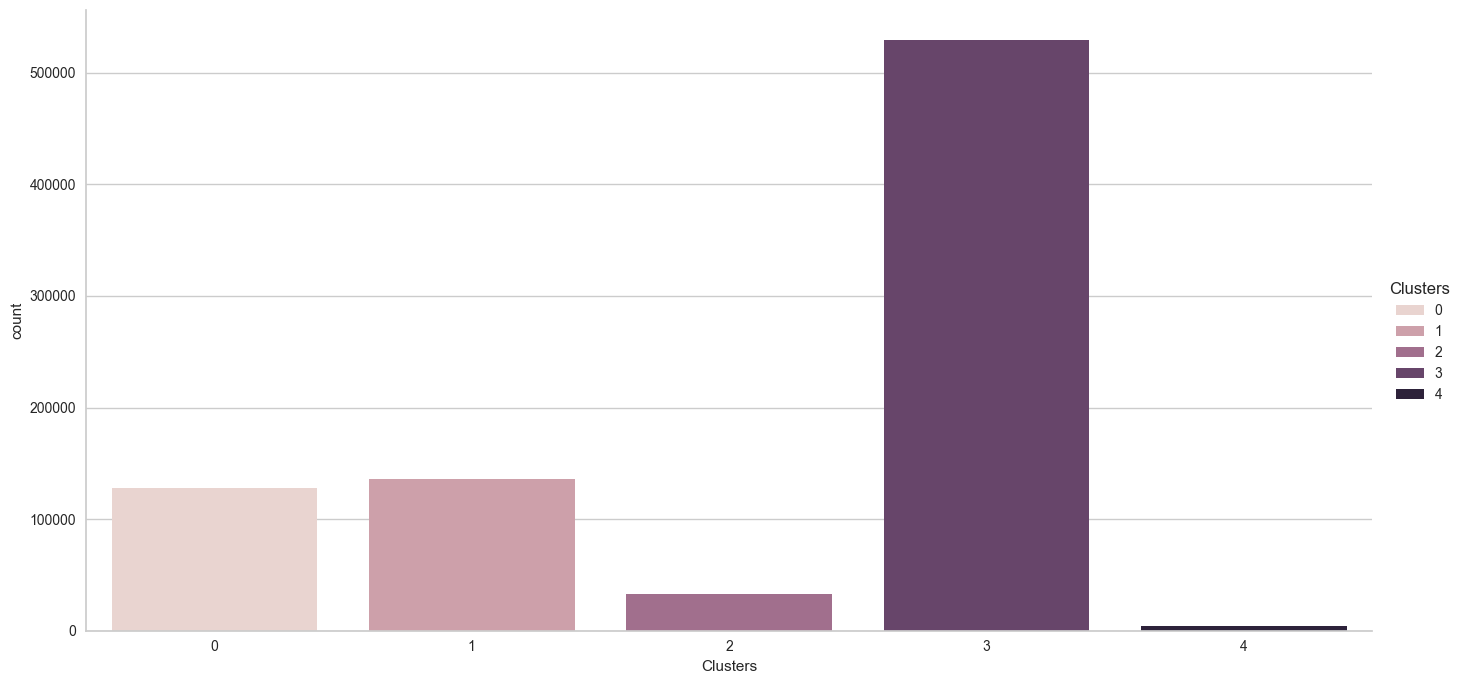

In [17]:
sns.catplot(data=df_new_k,x="Clusters",kind="count",height = 7,aspect=2, hue="Clusters")

In [18]:
count_3=count_0=0
for value in df_new_k["Clusters"]:
    if value==3:
        count_3+=1
    if value==0:
        count_0+=1
print(count_0,count_3)

127457 529670


In [19]:
new_location_ori = [(40.76, -73.99)]
kmeans_ori.predict(new_location_ori)

C:\Users\ziton\PycharmProjects\PythonProject\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [20]:
new_location_ori = [40.76, -74.1]

map_k_ori = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
folium.Marker(new_location_ori, popup = new_location_ori).add_to(map_k_ori)
map_k_ori

In [21]:
df_ori

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [22]:
df_ori.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [23]:
df_ori.columns = ['TimeStamp', 'Lat', 'Lon', 'Base']
df_ori

,TimeStamp,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [24]:
import time
ti = time.time()

df_ori["TimeStamp"] = pd.to_datetime(df_ori["TimeStamp"])

tf = time.time()

print(tf-ti," seconds")

1.7715342044830322  seconds


In [25]:
df_ori['weekday'] = df_ori.TimeStamp.dt.weekday
df_ori['month'] = df_ori.TimeStamp.dt.month
df_ori['day'] = df_ori.TimeStamp.dt.day
df_ori['hour'] = df_ori.TimeStamp.dt.hour
df_ori['minute'] = df_ori.TimeStamp.dt.minute


df_ori

,TimeStamp,Lat,Lon,Base,weekday,month,day,hour,minute
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,4,8,1,0,3
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,4,8,1,0,9
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,4,8,1,0,12
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,4,8,1,0,12
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,4,8,1,0,12
...,...,...,...,...,...,...,...,...,...
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,6,8,31,23,55
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764,6,8,31,23,55
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,6,8,31,23,55
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,6,8,31,23,59


In [26]:
## Hourly Ride Data
## groupby operation
hourly_ride_data = df_ori.groupby(['day','hour','weekday'])['TimeStamp'].count()

## reset index
hourly_ride_data = hourly_ride_data.reset_index()

## rename column
hourly_ride_data = hourly_ride_data.rename(columns = {'TimeStamp':'ride_count'})

## ocular analysis
hourly_ride_data

,day,hour,weekday,ride_count
0,1,0,4,734
1,1,1,4,451
2,1,2,4,289
3,1,3,4,318
4,1,4,4,412
...,...,...,...,...
739,31,19,6,1352
740,31,20,6,1260
741,31,21,6,1430
742,31,22,6,1352


In [27]:
## Weekday Hourly Averages
## groupby operation
weekday_hourly_avg = hourly_ride_data.groupby(['weekday','hour'])['ride_count'].mean()

## reset index
weekday_hourly_avg = weekday_hourly_avg.reset_index()

## rename column
weekday_hourly_avg = weekday_hourly_avg.rename(columns = {'ride_count':'average_rides'})

## sort by categorical index
weekday_hourly_avg = weekday_hourly_avg.sort_index()

## ocular analysis
weekday_hourly_avg

,weekday,hour,average_rides
0,0,0,273.5
1,0,1,171.0
2,0,2,140.0
3,0,3,296.5
4,0,4,459.0
...,...,...,...
163,6,19,1239.0
164,6,20,1198.0
165,6,21,1131.8
166,6,22,967.8


In [28]:
##Define Color Palette
tableau_color_blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]

for i in range(len(tableau_color_blind)):  
    r, g, b = tableau_color_blind[i]  
    tableau_color_blind[i] = (r / 255., g / 255., b / 255.)

C:\Users\ziton\AppData\Local\Temp\ipykernel_16600\1078729966.py:9: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.pointplot(ax=ax, x='hour',y='average_rides',hue='weekday',


Text(0.5, 0, 'Hour')

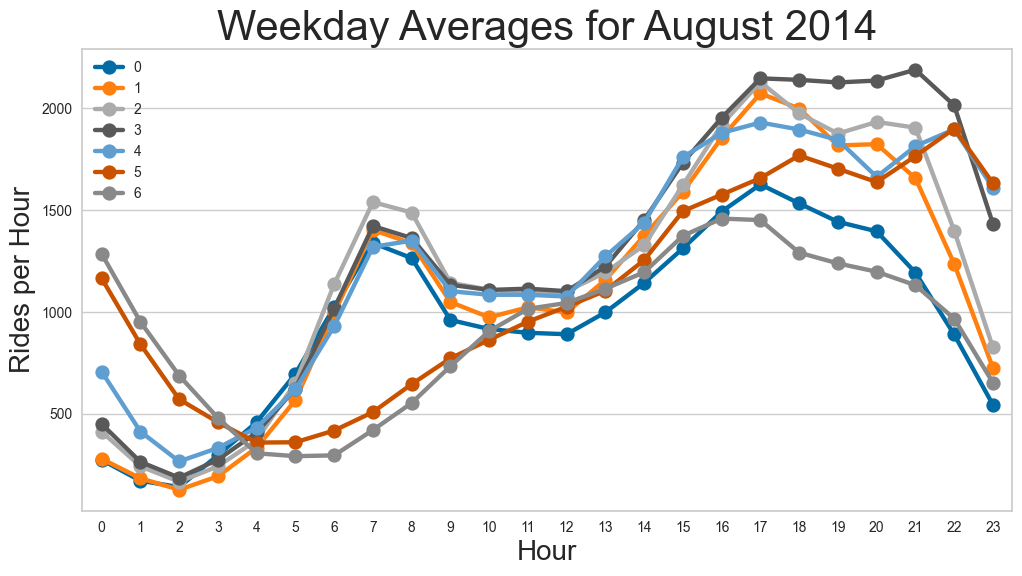

In [29]:
## create figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

## set palette   
current_palette = sns.color_palette(tableau_color_blind)

## plot data
sns.pointplot(ax=ax, x='hour',y='average_rides',hue='weekday', 
              palette = current_palette, data = weekday_hourly_avg)

## clean up the legend
l = ax.legend()
l.set_title('')

## format plot labels
ax.set_title('Weekday Averages for August 2014', fontsize=30)
ax.set_ylabel('Rides per Hour', fontsize=20)
ax.set_xlabel('Hour', fontsize=20)

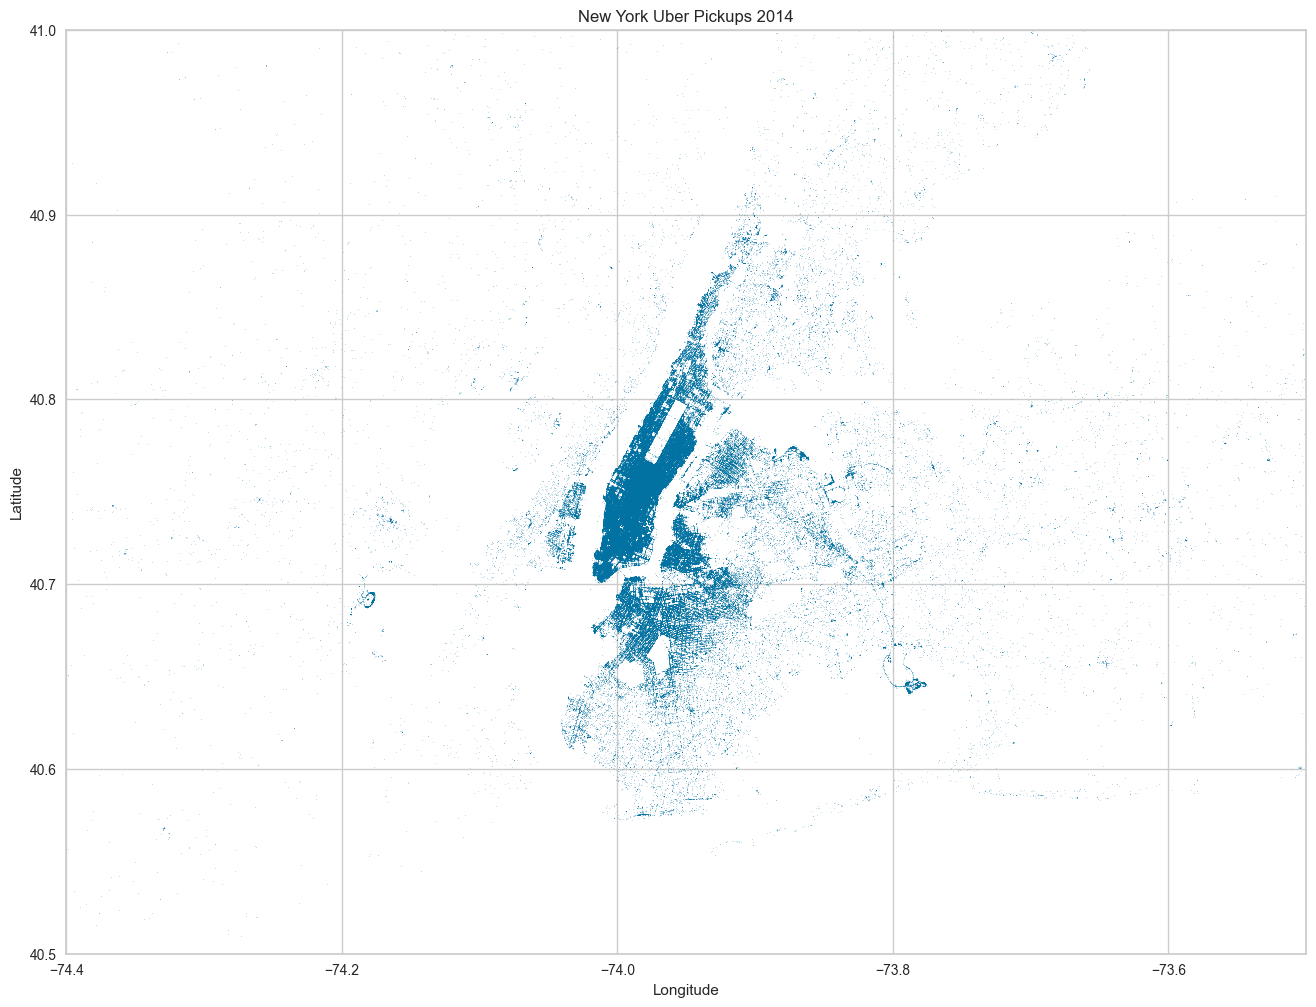

In [30]:

plt.figure(figsize=(16, 12))

plt.plot(df_ori.Lon, df_ori.Lat, '.', ms=.8, alpha=.5)

plt.ylim(bottom=40.5,top=41)
plt.xlim(left=-74.4,right=-73.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Uber Pickups 2014')

plt.show()

In [31]:
from folium.plugins import HeatMap

lat_lon = df_ori[["Lat", "Lon"]].values[:10000]
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
#A heatmap can be plotted like so... the radius argument controls the radius of each point within the map
#You can zoom in on this map to see more specific areas, or out to see more general
HeatMap(lat_lon, fradius=13).add_to(uber_map)
uber_map